## Init setup

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/ads/'

## Looking at our data

In [9]:
table_names = ['train_sample', 'test']

In [7]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [10]:
from IPython.display import HTML

In [11]:
for t in tables: display(t.head())

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [12]:
for t in tables: display(DataFrameSummary(t).summary())

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000,100000,100000,100000,100000,NaN,NaN,100000
mean,91255.9,12.0479,21.7712,22.8183,268.832,NaN,NaN,0.00227
std,69835.6,14.9415,259.668,55.9431,129.724,NaN,NaN,0.0475906
min,9,1,0,0,3,NaN,NaN,0
25%,40552,3,1,13,145,NaN,NaN,0
50%,79827,12,1,18,258,NaN,NaN,0
75%,118252,15,1,19,379,NaN,NaN,0
max,364757,551,3867,866,498,NaN,NaN,1
counts,100000,100000,100000,100000,100000,100000,227,100000
uniques,34857,161,100,130,161,80350,227,2


,click_id,ip,app,device,os,channel,click_time
count,1.87905e+07,1.87905e+07,1.87905e+07,1.87905e+07,1.87905e+07,1.87905e+07,NaN
mean,9.39523e+06,63069.2,12.2148,1.73051,18.7331,264.806,NaN
std,5.42434e+06,36886,11.6492,25.9704,11.3506,135.525,NaN
min,0,0,0,0,0,0,NaN
25%,4.69762e+06,31558,3,1,13,135,NaN
50%,9.39523e+06,63936,12,1,18,236,NaN
75%,1.40929e+07,95316,18,1,19,401,NaN
max,1.87905e+07,126413,521,3031,604,498,NaN
counts,18790469,18790469,18790469,18790469,18790469,18790469,18790469
uniques,18790469,93936,417,1985,395,178,21603


In [13]:
train, test = tables

In [15]:
len(train), len(test)

(100000, 18790469)

We can add more time related rows to this table with:

In [16]:
add_datepart(train, "click_time", drop=False)
add_datepart(test, "click_time", drop=False)

But most of this added data will not be that useful.. 

In [293]:
ids = st['ip']

In [368]:
#st.loc[st['ip'] == 87540]
#st.loc[st['is_attributed'] == 1]

In [295]:
#st.sort_values(['ip', 'click_time'])

Lets try something a little creative

Lets add the time since the last click and the time till the next click.

In [27]:
def get_elapsed(fld, pre):
    last_date = np.datetime64()
    last_ip = 0
    res = []
    
    for ip,d in zip(df.ip.values, df.click_time.values):
        if ip != last_ip:
            last_date = np.datetime64()
            last_ip = ip
        res.append(((d-last_date).astype('timedelta64[s]')/np.timedelta64(1, 's')))
        last_date = d
    df[pre+fld] = res

In [52]:
df = train

In [59]:
df = test

In [60]:
df = df.sort_values(['ip', 'click_time'])
get_elapsed('click_time', 'After')
df = df.set_index("click_time")
df['Afterclick_time'] = df['Afterclick_time'].fillna(0).astype(int)

In [61]:
df.reset_index(inplace=True)
df.to_feather(f'{PATH}df')

In [62]:
df = pd.read_feather(f'{PATH}df')

In [63]:
df["click_time"] = pd.to_datetime(df.click_time)

In [64]:
df.columns

Index(['click_time', 'index', 'click_id', 'ip', 'app', 'device', 'os',
       'channel', 'click_timeYear', 'click_timeMonth', 'click_timeWeek',
       'click_timeDay', 'click_timeDayofweek', 'click_timeDayofyear',
       'click_timeIs_month_end', 'click_timeIs_month_start',
       'click_timeIs_quarter_end', 'click_timeIs_quarter_start',
       'click_timeIs_year_end', 'click_timeIs_year_start', 'click_timeElapsed',
       'Afterclick_time'],
      dtype='object')

In [58]:
train = df
train.reset_index(inplace=True)
train.to_feather(f'{PATH}train')

In [65]:
test = df
test.reset_index(inplace=True)
test.to_feather(f'{PATH}test')

## Create features

In [3]:
train = pd.read_feather(f'{PATH}train')
test = pd.read_feather(f'{PATH}test')

In [4]:
test.head().T.head(40)

,0,1,2,3,4
level_0,0,1,2,3,4
click_time,2017-11-10 04:51:27,2017-11-10 04:54:10,2017-11-10 04:54:32,2017-11-10 10:37:15,2017-11-10 13:03:15
index,0,1,2,3,4
click_id,2890381,3036280,3055961,11125123,12490244
ip,0,0,1,2,2
app,0,0,10,15,6
device,0,0,1,1,1
os,0,0,7,13,13
channel,101,101,113,245,459
click_timeYear,2017,2017,2017,2017,2017


In [5]:
cat_vars = ['ip', 'app', 'device', 'os', 'channel','click_timeYear',
            'click_timeMonth', 'click_timeWeek', 'click_timeDay', 'click_timeDayofweek', 'click_timeDayofyear']

contin_vars = []

In [6]:
dep = 'is_attributed'
train = train[cat_vars+contin_vars+[dep, 'click_time']].copy()

In [7]:
test[dep] = 0
test = test[cat_vars+contin_vars+[dep, 'click_time', 'click_id']].copy()

In [8]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()

In [9]:
apply_cats(test, train)

/home/ubuntu/notebooks/fastai/structured.py:200: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)


In [10]:
n = len(train); n

100000

In [11]:
train.info(); test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
ip                     100000 non-null category
app                    100000 non-null category
device                 100000 non-null category
os                     100000 non-null category
channel                100000 non-null category
click_timeYear         100000 non-null category
click_timeMonth        100000 non-null category
click_timeWeek         100000 non-null category
click_timeDay          100000 non-null category
click_timeDayofweek    100000 non-null category
click_timeDayofyear    100000 non-null category
is_attributed          100000 non-null int64
click_time             100000 non-null datetime64[ns]
dtypes: category(11), datetime64[ns](1), int64(1)
memory usage: 4.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 14 columns):
ip                     category
app                    category
device       

In [12]:
train.reset_index(inplace=True)
train.set_index("click_time", inplace=True)

In [13]:
df, y, nas, mapper = proc_df(train, 'is_attributed', do_scale=True)

In [14]:
test.reset_index(inplace=True)
test.set_index("click_time", inplace=True)

In [15]:
df_test, _, nas, mapper = proc_df(test, 'is_attributed', do_scale=True, skip_flds=['click_id'], mapper=mapper, na_dict=nas)

In [16]:
df.head(2)

,index,ip,app,device,os,channel,click_timeYear,click_timeMonth,click_timeWeek,click_timeDay,click_timeDayofweek,click_timeDayofyear
click_time,,,,,,,,,,,,
2017-11-07 16:06:42,-1.732033,1,9,2,14,64,1,1,1,2,2,2
2017-11-07 01:37:19,-1.731999,2,11,2,23,82,1,1,1,2,2,2


In [17]:
n = len(train);
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(n * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [18]:
max_y = np.max(y)
y_range = (0, max_y*1.2)

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test[:100000])

In [25]:
cat_sz = [(c, len(train[c].cat.categories)+1) for c in cat_vars]

In [26]:
cat_sz

[('ip', 34858),
 ('app', 162),
 ('device', 101),
 ('os', 131),
 ('channel', 162),
 ('click_timeYear', 2),
 ('click_timeMonth', 2),
 ('click_timeWeek', 2),
 ('click_timeDay', 5),
 ('click_timeDayofweek', 5),
 ('click_timeDayofyear', 5)]

In [27]:
emb_szs = [(c, min(500, (c+1)//2)) for _,c in cat_sz]

In [28]:
emb_szs

[(34858, 500),
 (162, 81),
 (101, 51),
 (131, 66),
 (162, 81),
 (2, 1),
 (2, 1),
 (2, 1),
 (5, 3),
 (5, 3),
 (5, 3)]

In [29]:
display(df.head(5))
display(df_test.head(5))

,index,ip,app,device,os,channel,click_timeYear,click_timeMonth,click_timeWeek,click_timeDay,click_timeDayofweek,click_timeDayofyear
click_time,,,,,,,,,,,,
2017-11-07 16:06:42,-1.732033,1,9,2,14,64,1,1,1,2,2,2
2017-11-07 01:37:19,-1.731999,2,11,2,23,82,1,1,1,2,2,2
2017-11-07 07:33:04,-1.731964,2,12,2,20,38,1,1,1,2,2,2
2017-11-08 11:19:15,-1.731930,2,18,2,14,15,1,1,1,3,3,3
2017-11-08 09:12:26,-1.731895,3,14,2,17,106,1,1,1,3,3,3


,index,ip,app,device,os,channel,click_timeYear,click_timeMonth,click_timeWeek,click_timeDay,click_timeDayofweek,click_timeDayofyear
click_time,,,,,,,,,,,,
2017-11-10 04:51:27,-1.732033,0,0,1,1,13,1,1,1,0,0,0
2017-11-10 04:54:10,-1.731999,0,0,1,1,13,1,1,1,0,0,0
2017-11-10 04:54:32,-1.731964,0,10,2,8,19,1,1,1,0,0,0
2017-11-10 10:37:15,-1.731930,0,15,2,14,65,1,1,1,0,0,0
2017-11-10 13:03:15,-1.731895,0,6,2,14,139,1,1,1,0,0,0


In [30]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [31]:
m.lr_find()

epoch      trn_loss   val_loss                                  
    0      0.000755   0.00572   



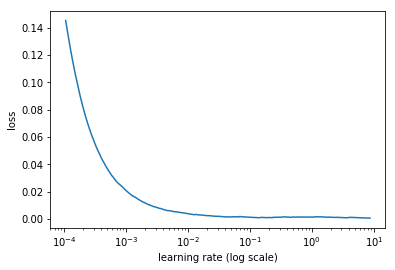

In [32]:
m.sched.plot(100)

In [33]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

def auc_roc(y_pred, targ): 
    return roc_curve(targ, y_pred)

In [67]:
# def inv_y(a): return np.exp(a)

# def exp_rmspe(y_pred, targ):
#     targ = inv_y(targ)
#     pct_var = (targ - inv_y(y_pred))/targ
#     return math.sqrt((pct_var**2).mean())

In [68]:
m.fit(lr, 3, metrics=[auc_roc])

 41%|████▏     | 243/586 [00:04<00:06, 49.60it/s, loss=0.000607]

Exception in thread Thread-24:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: all input arrays must have the same shape

In [218]:
?m

### backup

In [338]:
st.reset_index(inplace=True)
st.to_feather(f'{PATH}st')

In [355]:
st = pd.read_feather(f'{PATH}st')

In [260]:
apply_cats(st,st)

In [356]:
dep = 'is_attributed'
joined = st[cat_vars+contin_vars+[dep,'attributed_time','click_time']].copy()

In [357]:
joined = joined.set_index("click_time")
joined.head()

,ip,app,device,os,channel,click_timeYear,click_timeMonth,click_timeWeek,click_timeDay,click_timeDayofweek,click_timeDayofyear,is_attributed,attributed_time
click_time,,,,,,,,,,,,,
2017-11-07 16:06:42,9,9,1,13,244,2017,11,45,7,1,311,0,None
2017-11-07 01:37:19,10,11,1,22,319,2017,11,45,7,1,311,0,None
2017-11-07 07:33:04,10,12,1,19,140,2017,11,45,7,1,311,0,None
2017-11-08 11:19:15,10,18,1,13,107,2017,11,45,8,2,312,0,None
2017-11-08 09:12:26,19,14,1,16,379,2017,11,45,8,2,312,0,None


In [358]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()
for v in contin_vars: joined[v] = joined[v].astype('float32')

In [367]:
df, y, nas, mapper = proc_df(joined, 'is_attributed', do_scale=True)


ValueError: need at least one array to concatenate